In [ ]:
import Pkg
Pkg.activate(@__DIR__)

In [17]:
##Folder to print results
folder="Results_simple/Montpellier"

##Station
file="../mystations/TN_Montpellier.txt"

##AR model
p=6
k=5
method_="constant_params"           # "mean", "median", "concat", "sumLL", "monthlyLL", "constant_params"
periodicity_model="trigo"           # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period=k                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype="LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam=nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model="trigo"         # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period=k                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype="LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam=nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n=1000

1000

In [18]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

In [19]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => "../mystations/TN_Montpellier.txt"
  "p"                   => 6
  "method_"             => "constant_params"
  "periodicity_model"   => "trigo"
  "degree_period"       => 5
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 5
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 1000

In [20]:
series=extract_series(file,plot=false)
series=truncate_MV(series)

Caracteristics_Series = init_CaracteristicsSeries(series)

CaracteristicsSeries([2.7129870129870137, 2.602597402597403, 2.4688311688311684, 2.583116883116883, 1.7454545454545451, 2.0909090909090917, 1.8467532467532466, 1.84025974025974, 2.106493506493506, 2.625974025974026  …  3.3259740259740265, 3.9220779220779227, 3.511688311688312, 2.98961038961039, 2.594805194805195, 2.2194805194805194, 2.7857142857142856, 2.8000000000000007, 2.757142857142857, 2.890909090909091], [11.9, 11.2, 9.5, 12.3, 10.8, 10.5, 12.2, 11.5, 10.6, 10.6  …  13.3, 13.0, 11.4, 12.4, 12.3, 11.0, 12.8, 14.3, 11.1, 11.2], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       2.42266      4.33502         14.5
   2 │     2       3.14257      4.35576         15.3
   3 │     3       5.50913      3.69526         15.1
   4 │     4       8.25918      2.98022         17.3
   5 │     5      11.8933       2.87284         20.6
   6 │     6      15

In [21]:
Model = fit_AR(series[:, 2], series.DATE,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)

sample_ = rand(Model, n, series.DATE,return_res=true)


([[2.0, 5.1, 1.0, -1.0, -3.5999999999999996, -4.900000000000001, -4.4522229414267915, 0.08903758957685703, 0.5241407776336846, -2.2371886771566616  …  3.624179547464082, -1.917000733643758, -2.770543897150941, 0.3140869231488139, 7.252417037704767, 5.206666081477966, 4.9703052331289115, 9.844010088239536, 10.622903698420103, 5.850881023209884], [2.0, 5.1, 1.0, -1.0, -3.5999999999999996, -4.900000000000001, -2.7418528938756714, 0.33305474714634725, 5.638571627526953, 3.0968055147084725  …  1.965220692682828, 2.99597752578822, 5.231478936571125, 3.3409138027516025, 5.029200760301456, 8.342761174096541, 6.764845966038287, 4.552125872472243, 4.581565325568706, 14.117618771168544], [2.0, 5.1, 1.0, -1.0, -3.5999999999999996, -4.900000000000001, -5.559690473840217, 0.812873994621728, -0.08347807930457563, -1.412223442340642  …  11.11374716151159, 2.9234198074666295, 6.483305289408031, 8.43324545095592, 12.811450777223817, 7.468340971054833, 7.653598111953162, 11.23375968472649, 5.421287939849

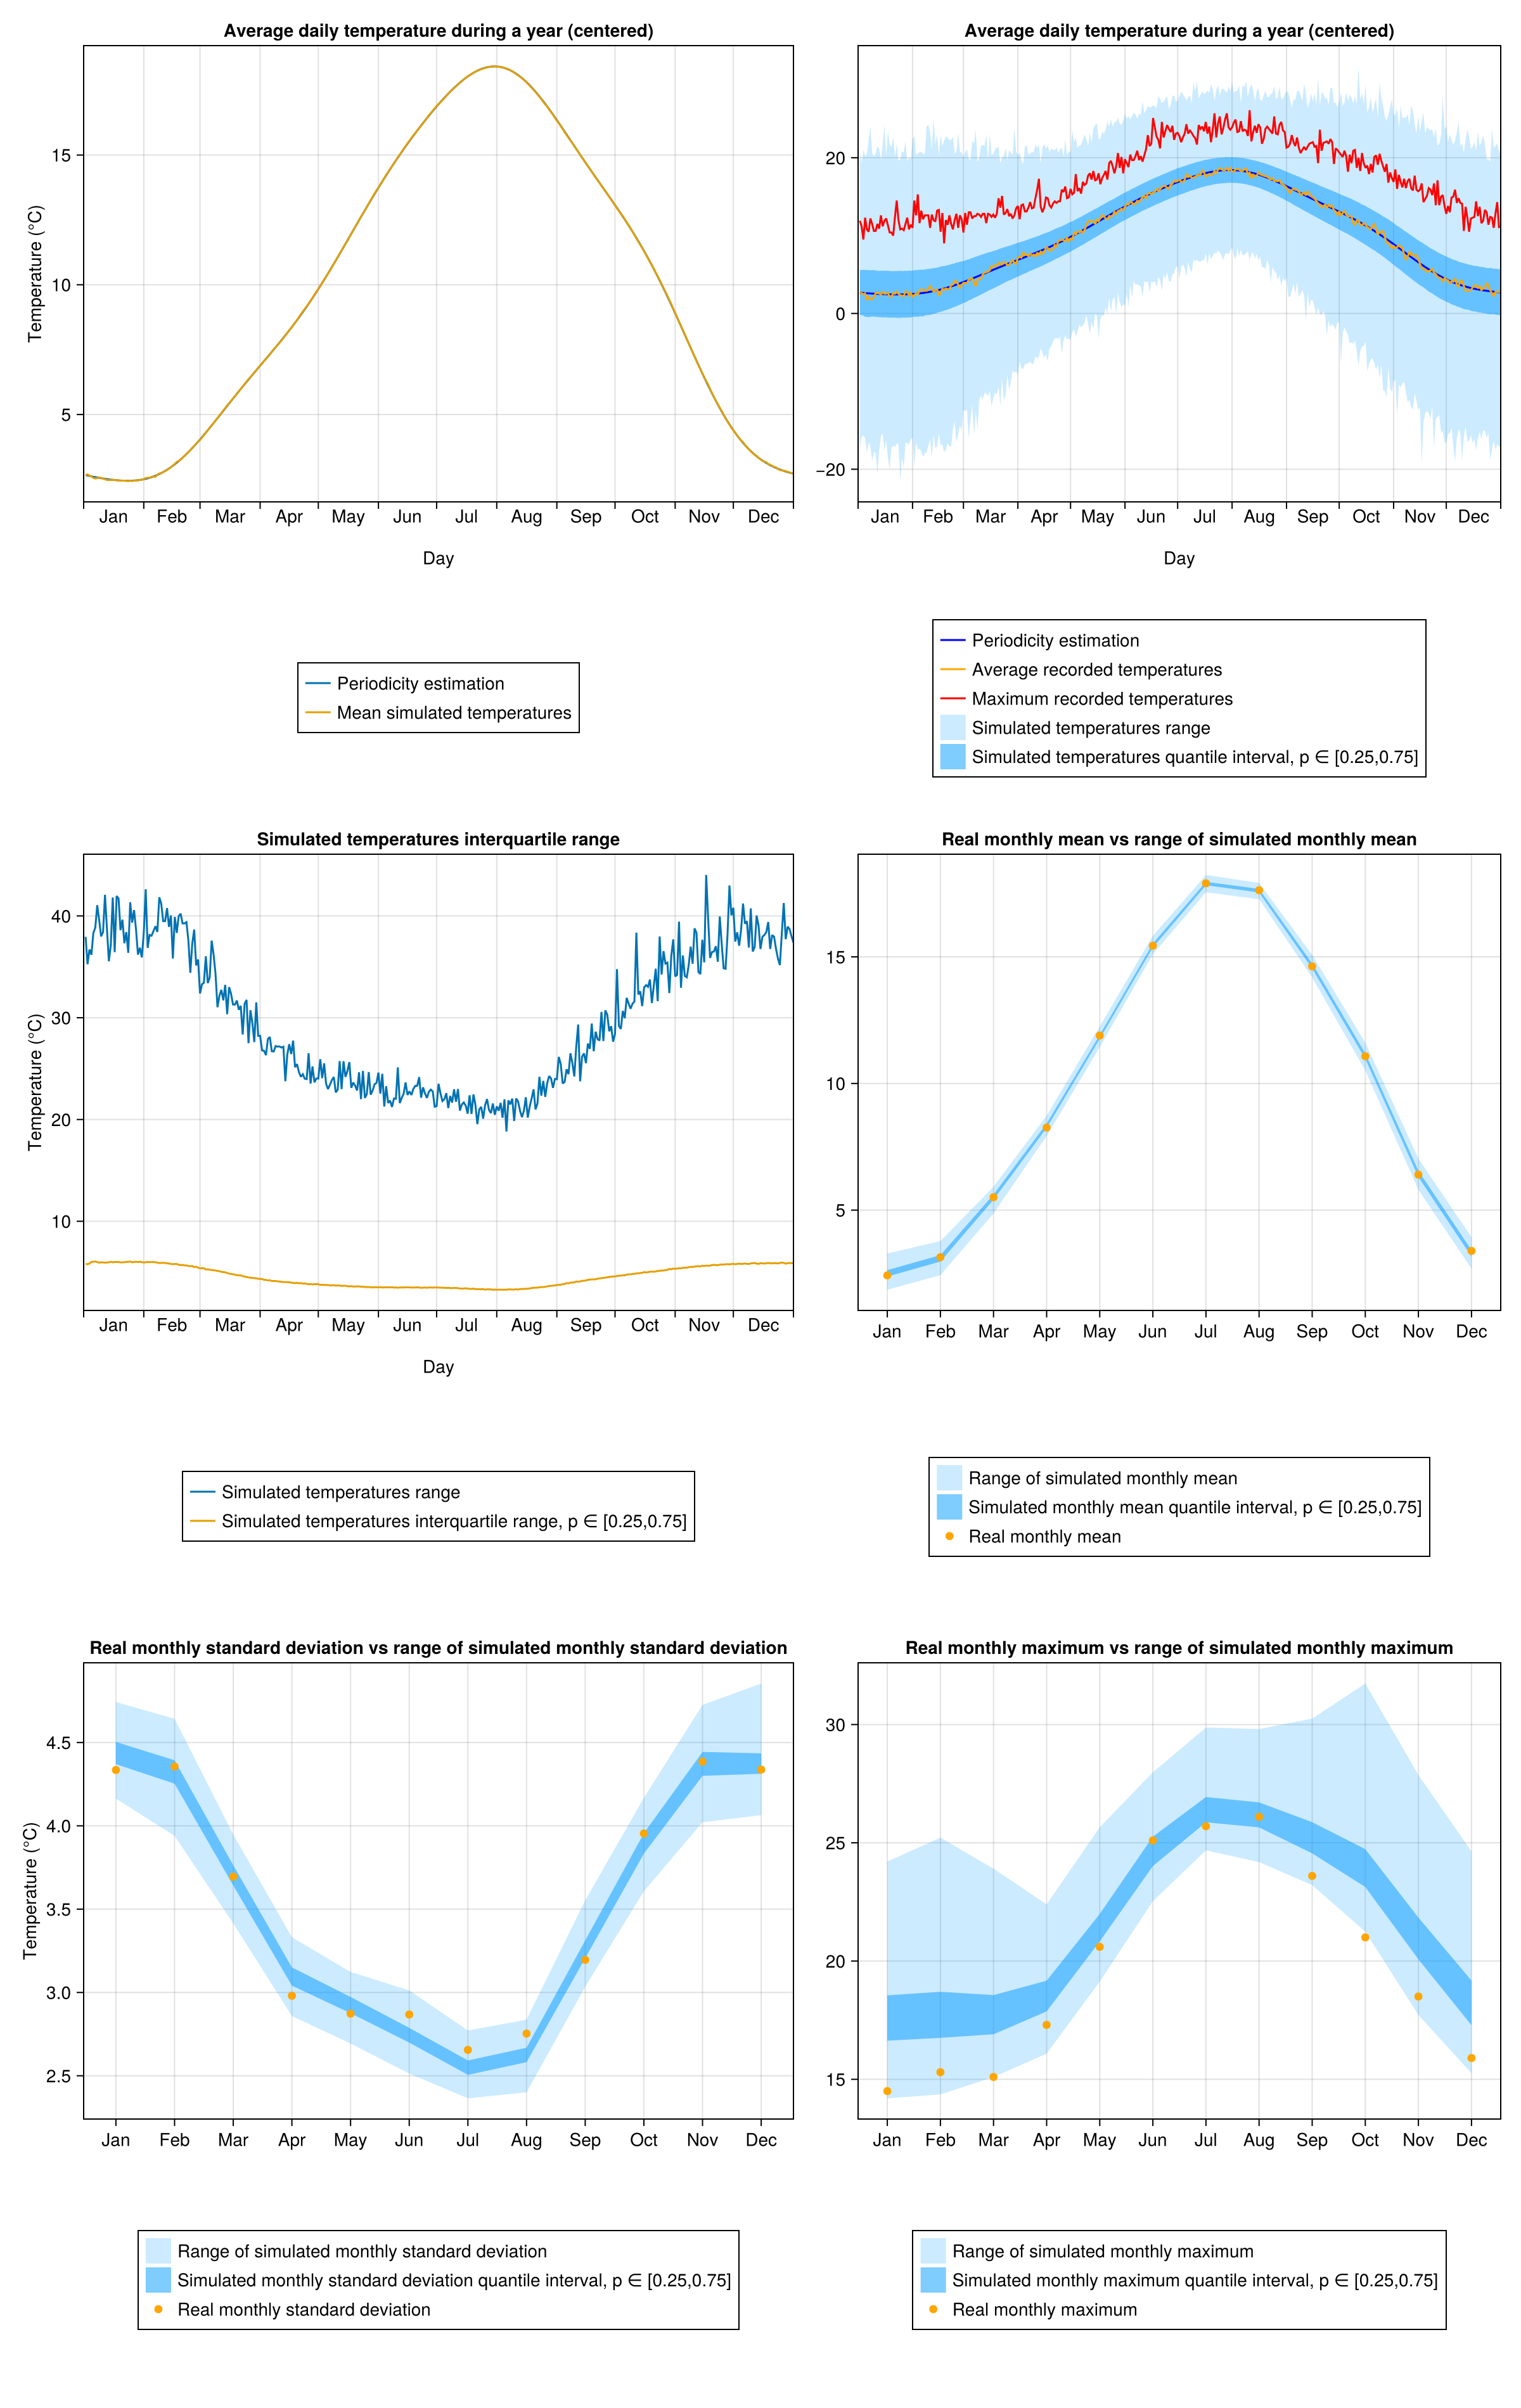

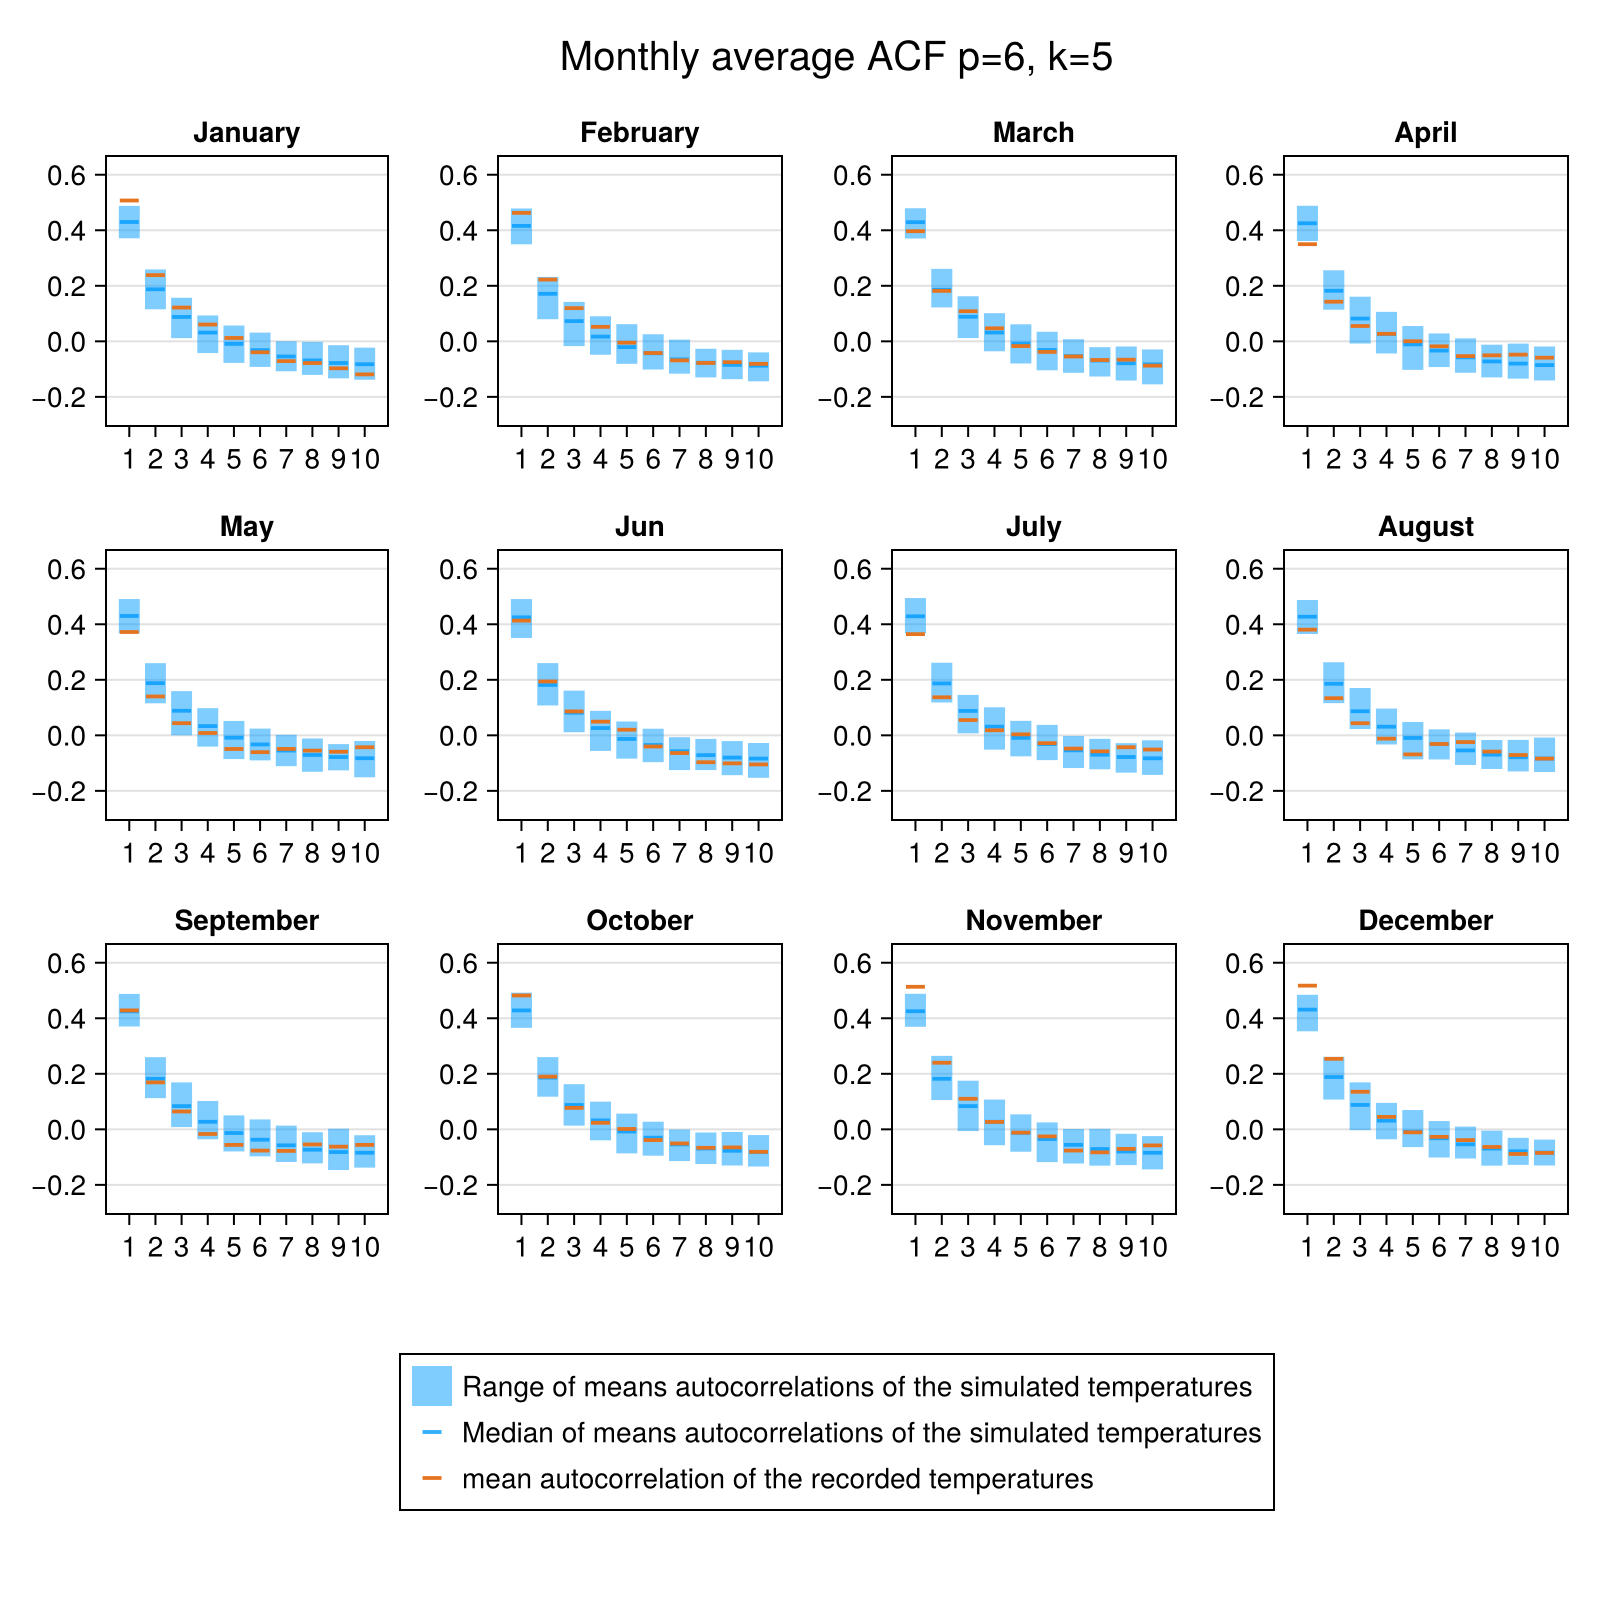

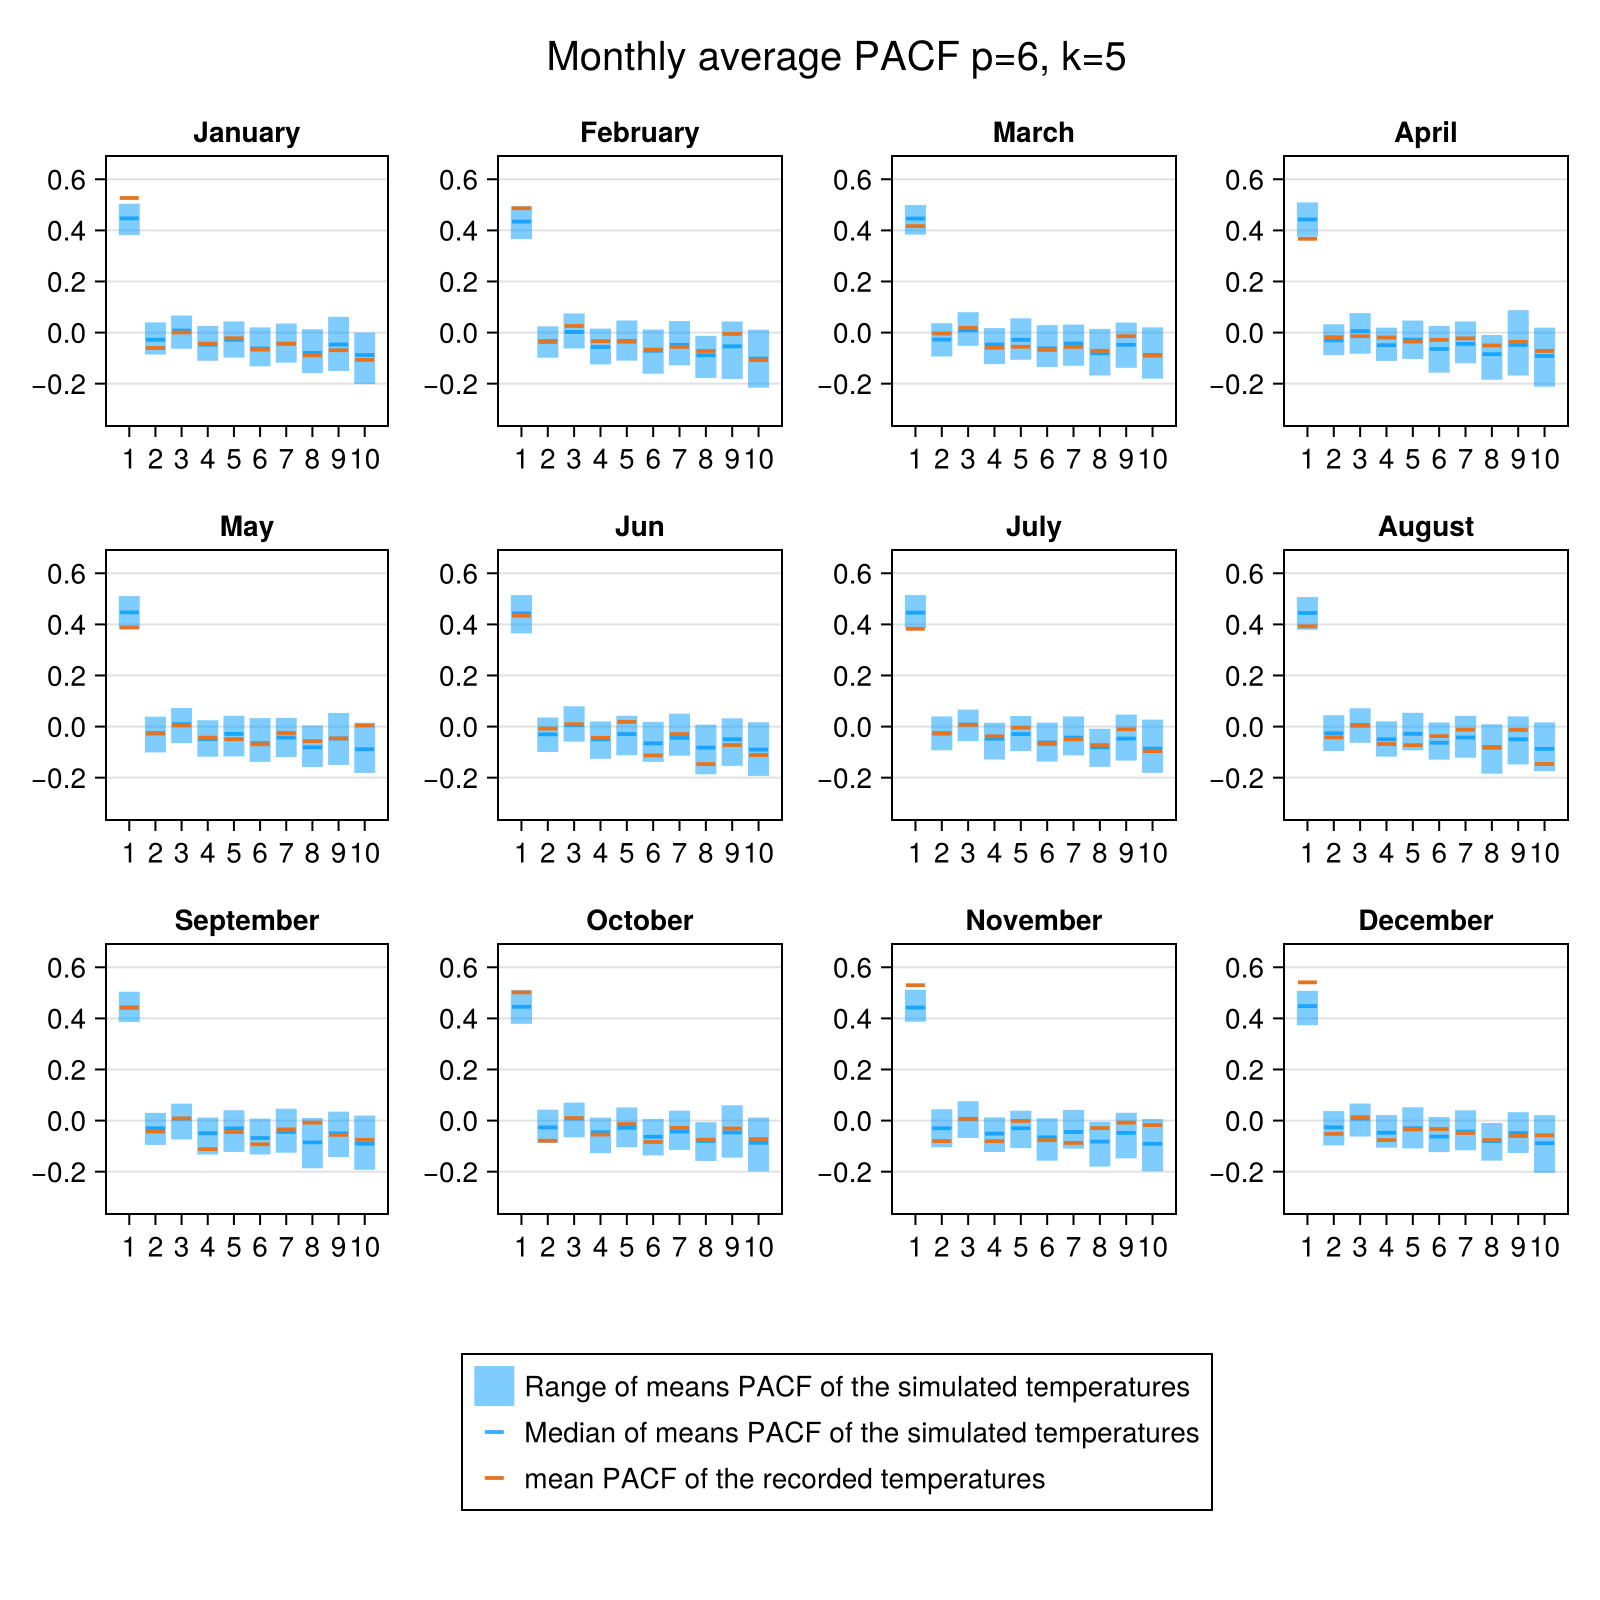

Parameters : 

Φ1 = 0.5226484462183553
Φ2 = 0.026990192072055365
Φ3 = 0.0437325166084957
Φ4 = 0.025328488227699317
Φ5 = 0.00945294703326876
Φ6 = 0.017850508650210362
σ = 0.8205082722060342 C° 

Additive periodicity order : 5
Multiplicative periodicity order : 5


In [22]:
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series, Model, folder=folder, settings=settings)
display.(fig_tuple)
println("Additive periodicity order : $(Model.period_order)")
println("Multiplicative periodicity order : $(Model.σ_period_order)")

In [23]:
N = length(Model.z)
nb_params = length(Model.Φ) + 1
Opp_LL_complete = Opp_Log_Monthly_Likelihood_AR_nspart(Model, Model.z, p, N)
AIC_complete = 2 * Opp_LL_complete + 2(nb_params + 2 * (2k + 1))
BIC_complete = 2 * Opp_LL_complete + (nb_params + 2 * (2k + 1)) * log(N)

133873.42510178743

In [24]:
println("AIC_complete = $(AIC_complete)")
println("BIC_complete = $(BIC_complete)")

AIC_complete = 133634.33812287118
BIC_complete = 133873.42510178743
